In [2]:
# Importing the libraries
import math
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import mean_squared_error

In [3]:
data = pd.read_csv("IBM_2006-01-01_to_2018-01-01.csv", index_col='Date', parse_dates=['Date'])

In [4]:
training_set = data[:'2016'].iloc[:, 1:2].values
validation_set = data['2017':].iloc[:, 1:2].values

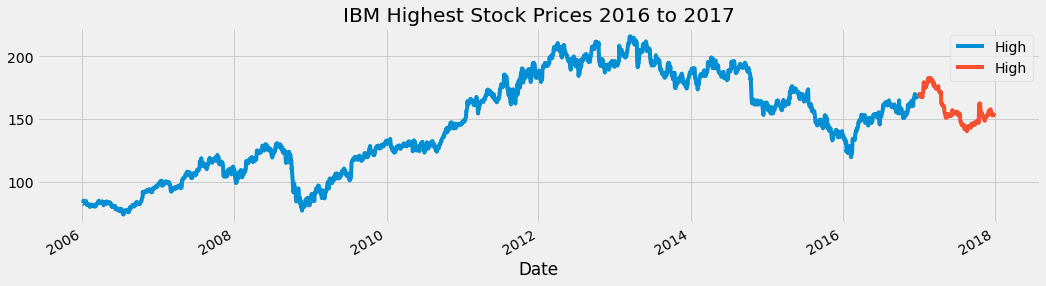

In [5]:
data['High'][:'2016'].plot(figsize = (16, 4), legend = True)
data['High']['2017':].plot(figsize = (16, 4), legend = True)
plt.title("IBM Highest Stock Prices 2016 to 2017")
plt.show()

In [6]:
training_set.shape, validation_set.shape

((2769, 1), (251, 1))

In [8]:
scaler = MinMaxScaler(feature_range = (0,1))
training_scaled = scaler.fit_transform(training_set)

X_train = []
y_train = []

for i in range(60, 2769):
    X_train.append(training_scaled[i - 60:i, 0])
    y_train.append(training_scaled[i,0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [10]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [11]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers, regularizers, initializers
from tensorflow.keras import Sequential

LSTM_model = Sequential([
    tf.keras.layers.LSTM(50, return_sequences = True, input_shape = (X_train.shape[1], 1)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(50, return_sequences = True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(50, return_sequences = True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(50),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])

In [12]:
LSTM_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                2

In [13]:
LSTM_model.compile(optimizer = "rmsprop", loss = "mean_squared_error")
LSTM_model.fit(X_train, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
85/85 [==============================] - 11s 55ms/step - loss: 0.0543
Epoch 2/10
85/85 [==============================] - 5s 55ms/step - loss: 0.0095
Epoch 3/10
85/85 [==============================] - 5s 56ms/step - loss: 0.0110
Epoch 4/10
85/85 [==============================] - 5s 54ms/step - loss: 0.0066
Epoch 5/10
85/85 [==============================] - 5s 54ms/step - loss: 0.0064
Epoch 6/10
85/85 [==============================] - 5s 53ms/step - loss: 0.0052
Epoch 7/10
85/85 [==============================] - 5s 57ms/step - loss: 0.0049
Epoch 8/10
85/85 [==============================] - 5s 53ms/step - loss: 0.0047
Epoch 9/10
85/85 [==============================] - 5s 53ms/step - loss: 0.0044
Epoch 10/10
85/85 [==============================] - 5s 55ms/step - loss: 0.0042
